# Data Cleaning and EDA


#### Data Cleaning

Before diving into the analysis, the dataset needed cleaning to ensure its accuracy and reliability. The first step involved handling missing values, particularly in key fields such as job title and description. Any listings that lacked this critical information were removed, while other categorical fields such as industry and employment type were filled with the placeholder “Unknown” to maintain consistency. Text fields like company profile, requirements, and benefits, which often contained missing values, were replaced with "Not Provided" to preserve completeness.


In [196]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

Reading our Dataset

In [159]:
file_path = r'E:\ds\project\fake_job_postings.csv'
df = pd.read_csv(file_path)
initial_count = len(df)

In [160]:
df.shape

(17880, 18)

In [161]:
null=df.isna().sum().to_frame()
null[null[0]>0]

,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
employment_type,3471
required_experience,7050
required_education,8105


Replacing empty strings with Nan for easier Cleaning later on

In [162]:
filtered_df = df.replace('', pd.NA)

**Step 1:** Drop rows where 'title' or 'description' are empty


In [163]:
filtered_df = filtered_df.dropna(subset=['title', 'description']).copy()
dropped_count = initial_count - len(filtered_df)
print(f'Step 1: Dropped {dropped_count} rows due to missing title or description.')


Step 1: Dropped 1 rows due to missing title or description.


**Step 2:** # Fill empty 'industry', 'employment_type', and 'department' with 'Unknown'

In [164]:
industry_nan_count = filtered_df['industry'].isna().sum()
employment_type_nan_count = filtered_df['employment_type'].isna().sum()
department_nan_count = filtered_df['department'].isna().sum()
location_nan_count = filtered_df['location'].isna().sum()
print(industry_nan_count)
print(employment_type_nan_count)
print(department_nan_count)
print(location_nan_count)

4902
3470
11546
346


**Step 4:** Standardize categorical fields to lowercase

In [165]:
filtered_df = filtered_df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
print('Step 4: Converted all categorical values to lowercase.')


Step 4: Converted all categorical values to lowercase.


In [166]:
filtered_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,marketing intern,"us, ny, new york",marketing,NaN,"we're food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",experience with content management systems a m...,NaN,0,1,0,other,internship,NaN,NaN,marketing,0
1,2,customer service - cloud video production,"nz, , auckland",success,NaN,"90 seconds, the worlds cloud video production ...",organised - focused - vibrant - awesome!do you...,what we expect from you:your key responsibilit...,what you will get from usthrough being part of...,0,1,0,full-time,not applicable,NaN,marketing and advertising,customer service,0
2,3,commissioning machinery assistant (cma),"us, ia, wever",NaN,NaN,valor services provides workforce solutions th...,"our client, located in houston, is actively se...",implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,account executive - washington dc,"us, dc, washington",sales,NaN,our passion for improving quality of life thro...,the company: esri – environmental systems rese...,"education: bachelor’s or master’s in gis, busi...",our culture is anything but corporate—we have ...,0,1,0,full-time,mid-senior level,bachelor's degree,computer software,sales,0
4,5,bill review manager,"us, fl, fort worth",NaN,NaN,spotsource solutions llc is a global human cap...,job title: itemization review managerlocation:...,qualifications:rn license in the state of texa...,full benefits offered,0,1,1,full-time,mid-senior level,bachelor's degree,hospital & health care,health care provider,0


In [167]:
filtered_df.isna().sum()

job_id                     0
title                      0
location                 346
department             11546
salary_range           15011
company_profile         3307
description                0
requirements            2695
benefits                7211
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3470
required_experience     7049
required_education      8104
industry                4902
function                6454
fraudulent                 0
dtype: int64

In [170]:
filtered_df.shape

(17879, 18)

In [171]:
filtered_df[filtered_df['fraudulent']==1].shape

(865, 18)

Step 5: Drop rows where Location is null.

In [172]:
filtered_df = filtered_df.dropna(subset=['location'])
filtered_df.shape

(17533, 18)

In [173]:
filtered_df = filtered_df[['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']]

**Step 7:** Remove special characters while retaining important punctuation

In [177]:
columns_to_clean = ['company_profile', 'description', 'requirements', 'benefits']
special_char_counts = ''

def clean_text(text):
    if pd.isna(text):
        return text
    return re.sub(r'[^a-zA-Z0-9.,!?\-\s]', '', text)

for column in columns_to_clean:
    filtered_df[column] = filtered_df[column].apply(clean_text)

print(f'Step 7: Removed special characters. Counts before cleaning: {special_char_counts}')


Step 7: Removed special characters. Counts before cleaning: 


#### Insights

Top 10 Industries by Number of Job Postings

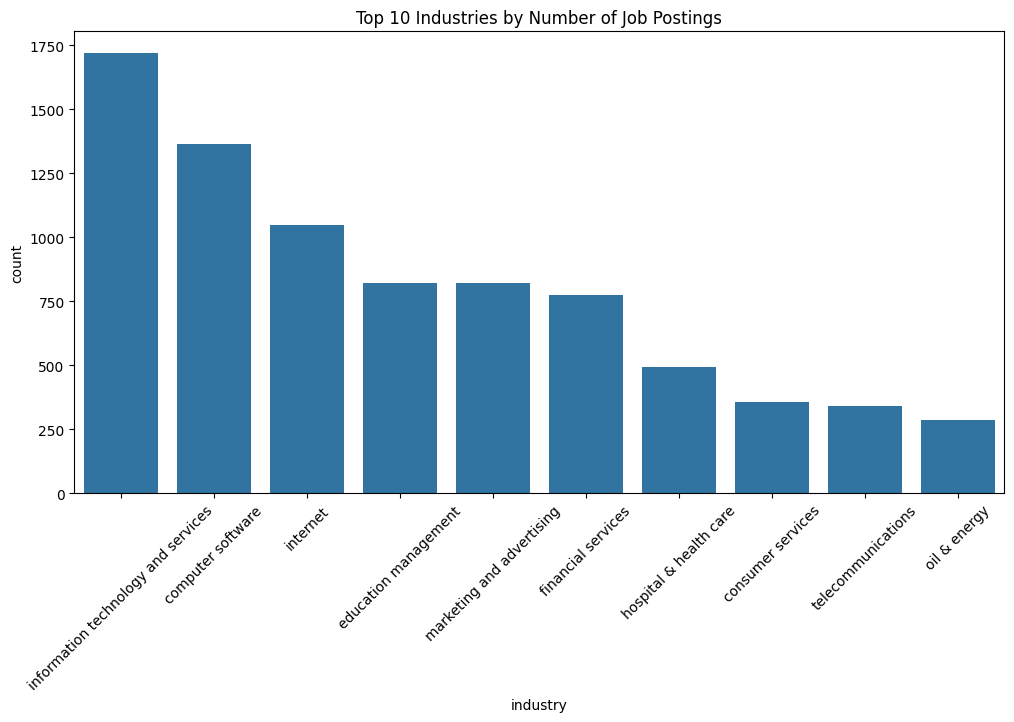

In [178]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='industry', order=filtered_df['industry'].value_counts().index[:10])
plt.title('Top 10 Industries by Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

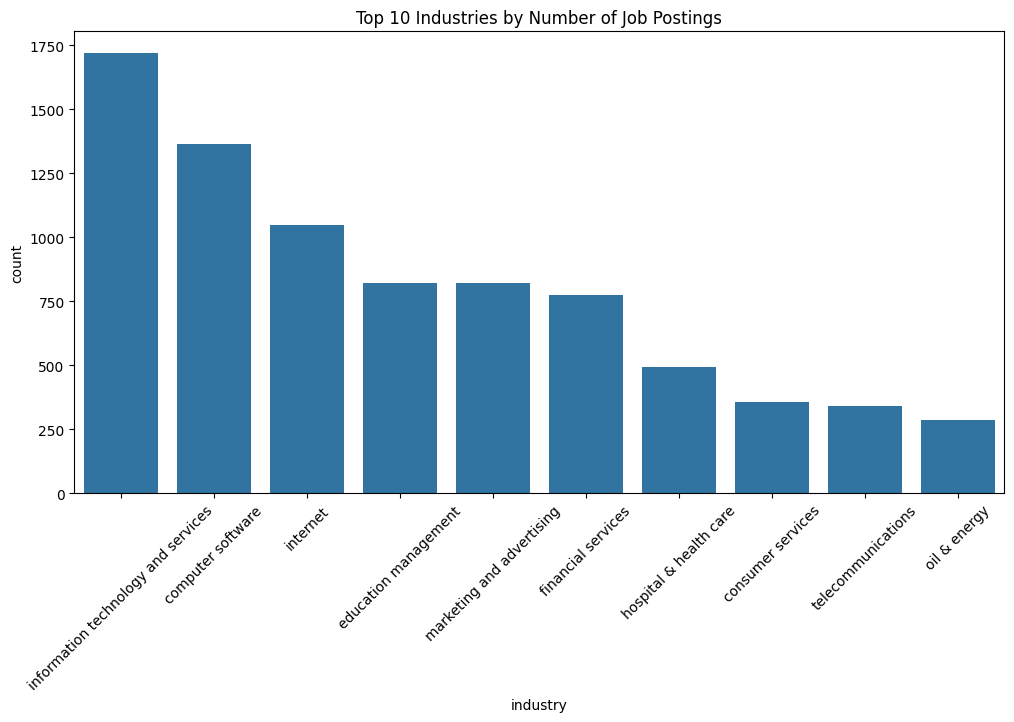

In [179]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='industry', order=filtered_df['industry'].value_counts().index[:10])
plt.title('Top 10 Industries by Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

Employment Type Distribution (Fraudulent vs Non-Fraudulent)

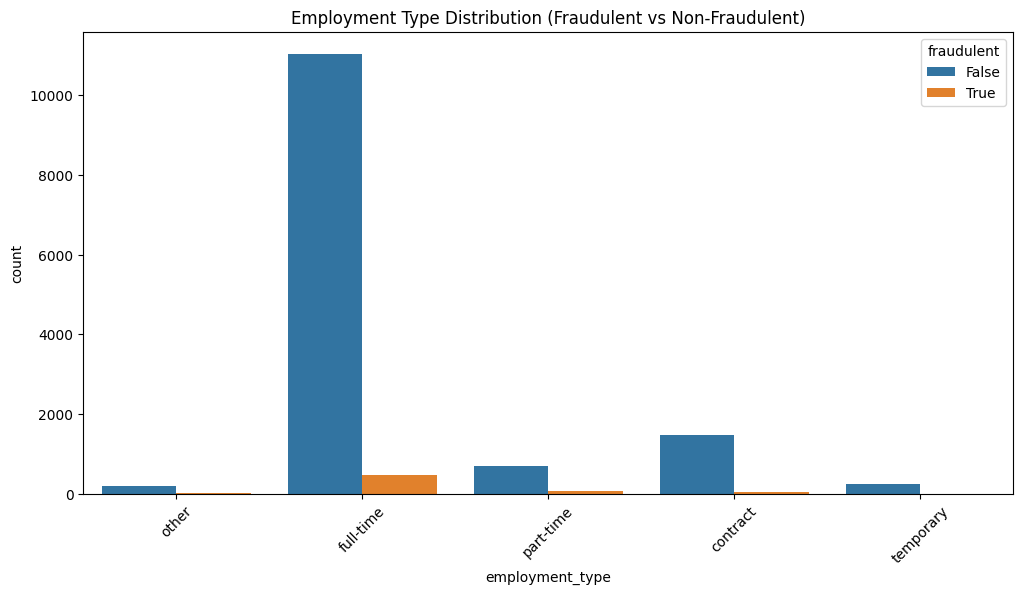

In [180]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='employment_type', hue='fraudulent')
plt.title('Employment Type Distribution (Fraudulent vs Non-Fraudulent)')
plt.xticks(rotation=45)
plt.show()


Top 10 Locations with Most Fraudulent Job Postings:

In [181]:
fraud_by_location = filtered_df[filtered_df['fraudulent'] == True]['location'].value_counts().head(10)
print('Top 10 Locations with Most Fraudulent Job Postings:')
print(fraud_by_location)

Top 10 Locations with Most Fraudulent Job Postings:
location
us, tx, houston        94
au, nsw, sydney        31
us, ca, los angeles    29
us, ,                  28
us, ca, bakersfield    24
us, ca, san mateo      22
us, ny, new york       21
us, tx, austin         21
us, ca, san jose       14
us, tx, dallas         14
Name: count, dtype: int64


How many fradulent jobs are related to having no employment type specified?

In [182]:
fraud_unkbown_emp_type = filtered_df[(filtered_df['fraudulent'] == True) & (filtered_df['employment_type'] == 'unknown')].shape[0]
print(f'Number of Fraudulent jobs with unknown employment type: {fraud_unkbown_emp_type}')

Number of Fraudulent jobs with unknown employment type: 0


Industry-wise Fraud Analysis

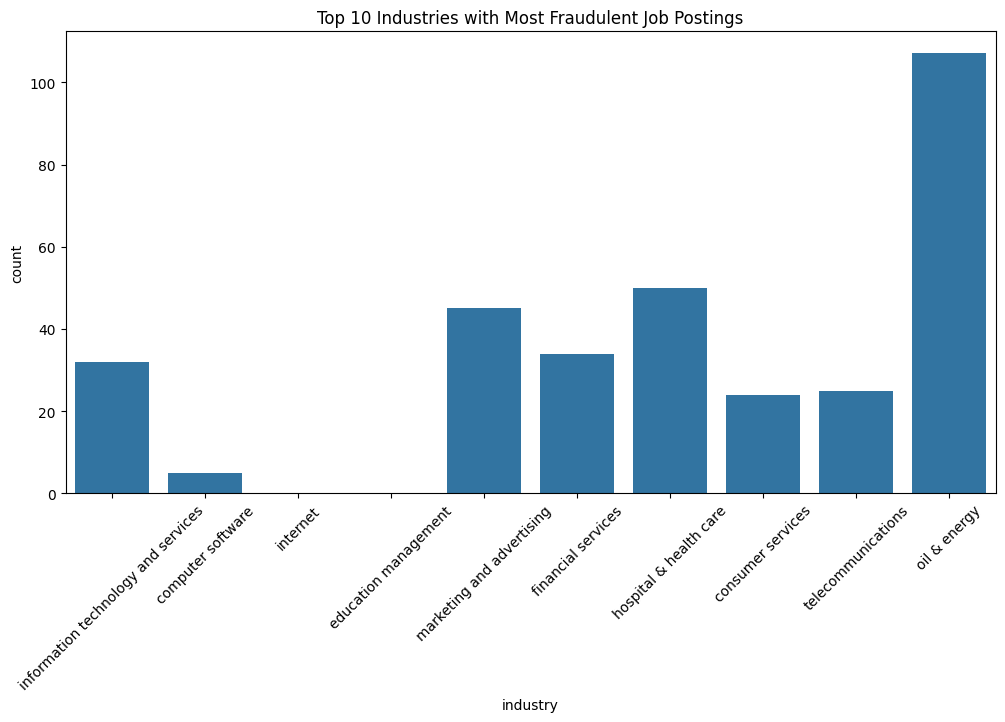

In [183]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df[filtered_df['fraudulent'] == True], x='industry', order=filtered_df['industry'].value_counts().index[:10])
plt.title('Top 10 Industries with Most Fraudulent Job Postings')
plt.xticks(rotation=45)
plt.show()

Top 10 Departments with Most Fraudulent Job Postings

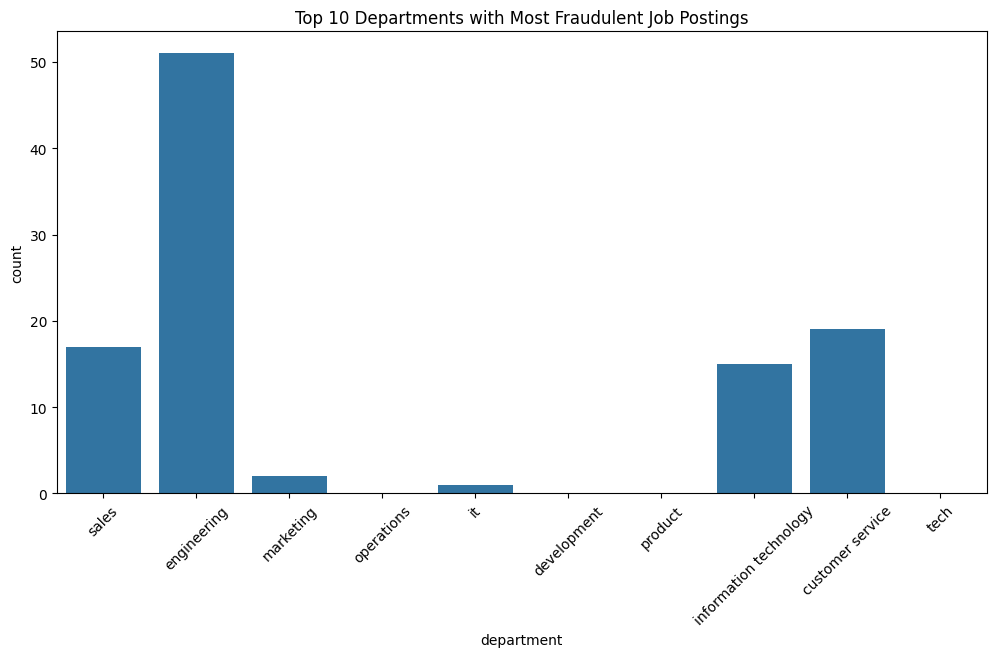

In [184]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df[filtered_df['fraudulent'] == True], x='department', order=filtered_df['department'].value_counts().index[:10])
plt.title('Top 10 Departments with Most Fraudulent Job Postings')
plt.xticks(rotation=45)
plt.show()

Is not having questions an indicator of a fake job posting?

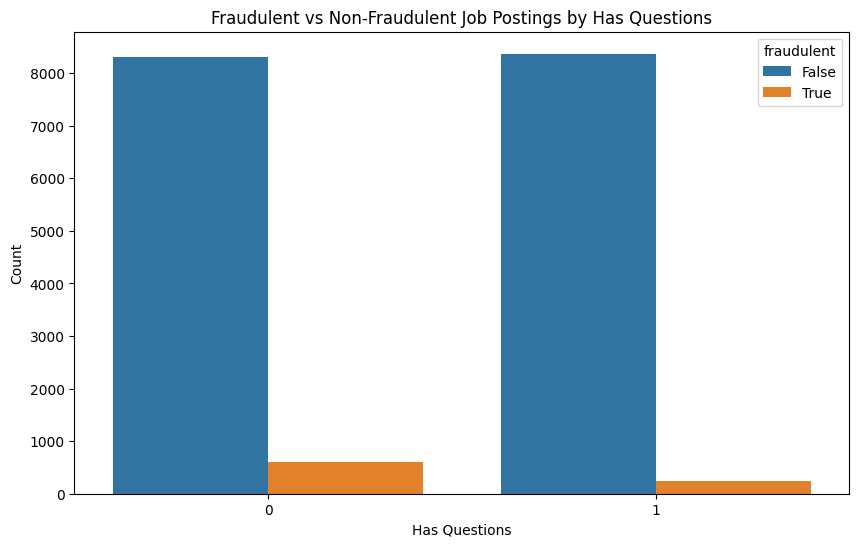

In [185]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='has_questions', hue='fraudulent')
plt.title('Fraudulent vs Non-Fraudulent Job Postings by Has Questions')
plt.xlabel('Has Questions')
plt.ylabel('Count')
plt.show()


Is not having a company logo an incdicator of a fake job positng?

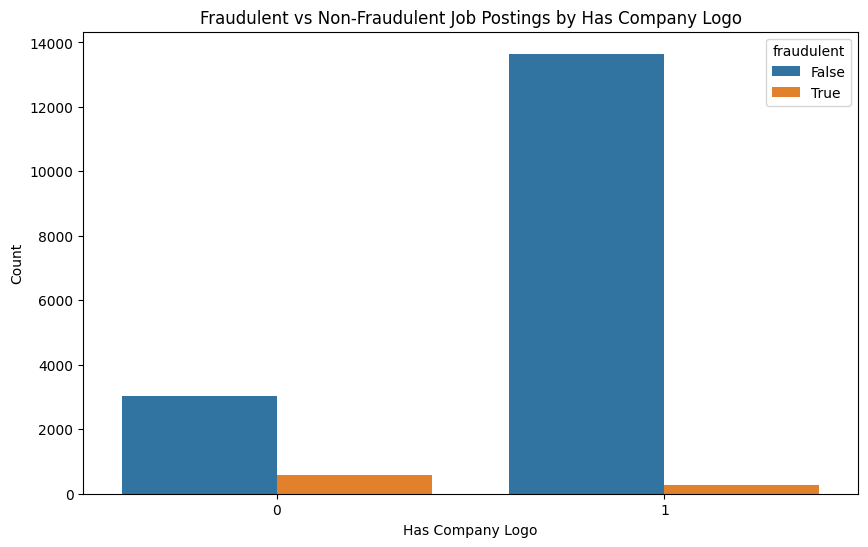

In [186]:

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='has_company_logo', hue='fraudulent')
plt.title('Fraudulent vs Non-Fraudulent Job Postings by Has Company Logo')
plt.xlabel('Has Company Logo')
plt.ylabel('Count')
plt.show()


Are remote jobs more likley to be fradulent than other?

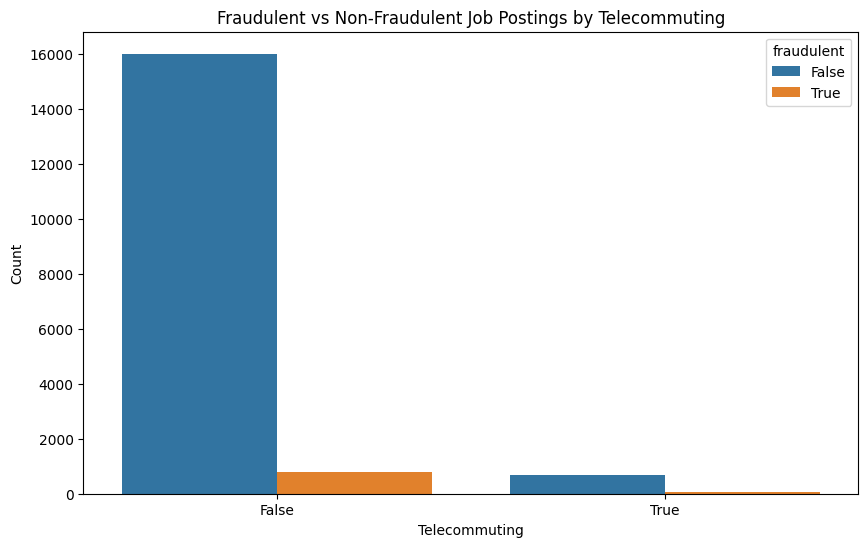

In [187]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='telecommuting', hue='fraudulent')
plt.title('Fraudulent vs Non-Fraudulent Job Postings by Telecommuting')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.show()


In [188]:
filtered_df['fraudulent']=filtered_df['fraudulent'].astype(int)
filtered_df['telecommuting']=filtered_df['telecommuting'].astype(int)


In [189]:
filtered_df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int32
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int32
dtype: object

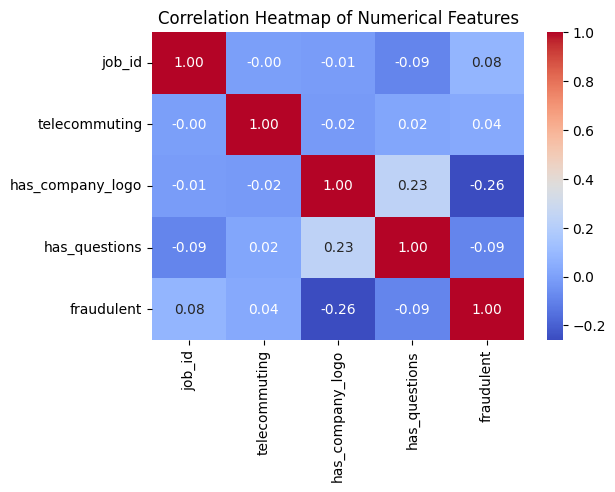

In [190]:
num_df = filtered_df.select_dtypes(include='number')
corr = num_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<Axes: xlabel='fraudulent', ylabel='count'>

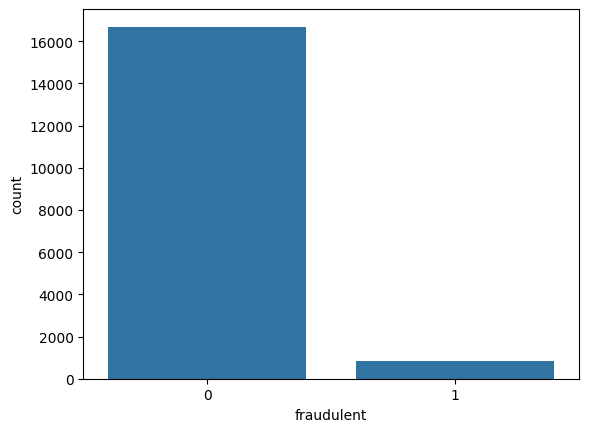

In [191]:
sns.countplot(x='fraudulent', data=filtered_df)


Text(0.5, 0, 'Character Count')

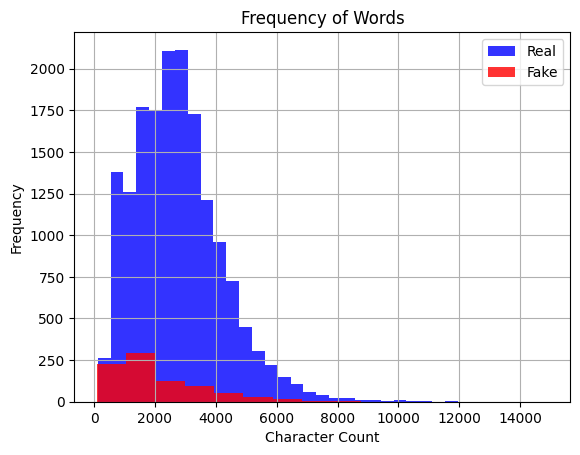

In [ ]:
filtered_df.fillna(" ",inplace = True)

filtered_df['text'] =  filtered_df['title'] + ' ' + filtered_df['location'] + ' ' + filtered_df['company_profile'] + ' ' + \
        filtered_df['description'] + ' ' + filtered_df['requirements'] + ' ' + filtered_df['benefits'] + ' ' + \
        filtered_df['required_experience'] + ' ' + filtered_df['required_education'] + ' ' + filtered_df['industry'] + ' ' + filtered_df['function']


filtered_df.drop(['job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','has_company_logo', 'has_questions'], axis = 1, inplace = True)
filtered_df['character_count'] = filtered_df.text.apply(len)

filtered_df[filtered_df.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
filtered_df[filtered_df.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.grid()
plt.title('Frequency of Words')
plt.xlabel("Character Count")

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [ ]:
text = filtered_df.text.to_list()
text = ' '.join(text)
tokens_text = word_tokenize(text)
lower_tokens = [t.lower() for t in tokens_text]
word_freq = Counter(lower_tokens)
print(Counter.most_common(word_freq, 10))

[(',', 393174), ('and', 352586), ('to', 199876), ('the', 193910), ('.', 169122), ('of', 149209), ('a', 138760), ('in', 122797), ('with', 88576), ('for', 81414)]


In [ ]:
text_only_alphabets = [t for t in lower_tokens if t.isalpha()]
english_stopped = stopwords.words('english')
no_stops = [t for t in text_only_alphabets if t not in english_stopped]
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized)
print(Counter.most_common(bow, 10))

[('team', 35198), ('work', 34884), ('experience', 34050), ('service', 31959), ('company', 27264), ('customer', 27069), ('business', 23269), ('u', 21558), ('client', 19338), ('product', 19052)]


In [ ]:
filtered_df.to_csv('jobs_cleaned.csv',index=False)